In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Net Immigration Migration (NIM) data
nim_df = pd.read_csv("Resources/Census-NIM-2017-2060_np2017_d4.csv")

# display data
nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,9,2,2056,110859,2189,1969,1828,1632,1363,1201,...,-160,-131,-111,-96,-114,-167,-241,-332,-428,-4881
1316,9,2,2057,111134,2199,1979,1838,1640,1370,1208,...,-162,-146,-119,-103,-124,-165,-254,-333,-415,-4913
1317,9,2,2058,111405,2207,1987,1845,1647,1377,1213,...,-166,-146,-131,-109,-129,-175,-251,-350,-416,-4923
1318,9,2,2059,111663,2217,1997,1854,1655,1382,1218,...,-169,-151,-131,-122,-137,-182,-264,-347,-434,-4936


In [3]:
# filter data to show total NIM data for both males and females together. In census NIM dataset, 
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races.
nim_df_mf = nim_df.loc[(nim_df['RACE_HISP'] == 0) & (nim_df['SEX'] == 0),:]
nim_df_mf.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167


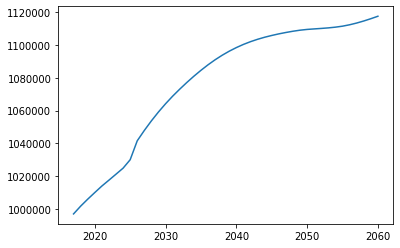

In [4]:
# assign x and y values to prepare to plot graph
year = nim_df_mf['YEAR']
nim = nim_df_mf['TOTAL_NIM']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, nim)
#tick_locations = np.arange(len(year))
#plt.xticks(tick_locations, nim_short_df['YEAR'], rotation=90)


The r-squared is: 0.936023542745225


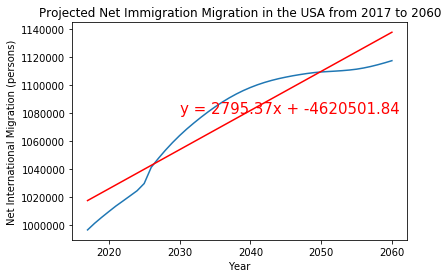

In [5]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, nim)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year, nim)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(2030,1080000),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')
plt.title('Projected Net Immigration Migration in the USA from 2017 to 2060')
print(f"The r-squared is: {rvalue}")

# show plot
plt.show()

In [6]:
# create new column with low NIM projected rates by freezing real-time 
# 2019 NIM rates of 595,348 for all years from 2019 to 2060. NIM rates for 
# before 2019 to be the same as historical rates. 
nim_df_mf['NIM_LOW'] = np.where(nim_df_mf['YEAR']>2018, 595348, nim_df_mf['TOTAL_NIM'])
nim_df_mf.head()


,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85,NIM_LOW
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,441,342,147,-48,-277,-599,-854,-1159,-11590,996800
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,380,225,68,-140,-328,-672,-983,-1209,-11898,1001528
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,348,143,-23,-190,-432,-757,-1031,-1367,-12238,595348
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,44,119,-125,-286,-477,-862,-1152,-1414,-12718,595348
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,98,-176,-149,-399,-604,-911,-1264,-1546,-13167,595348


In [7]:
# reorganize columns 
nim_df_mf.columns

nim_df_mf = nim_df_mf[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','NIM_LOW', 'NIM_0', 'NIM_1', 'NIM_2',
       'NIM_3', 'NIM_4', 'NIM_5', 'NIM_6', 'NIM_7', 'NIM_8', 'NIM_9', 'NIM_10',
       'NIM_11', 'NIM_12', 'NIM_13', 'NIM_14', 'NIM_15', 'NIM_16', 'NIM_17',
       'NIM_18', 'NIM_19', 'NIM_20', 'NIM_21', 'NIM_22', 'NIM_23', 'NIM_24',
       'NIM_25', 'NIM_26', 'NIM_27', 'NIM_28', 'NIM_29', 'NIM_30', 'NIM_31',
       'NIM_32', 'NIM_33', 'NIM_34', 'NIM_35', 'NIM_36', 'NIM_37', 'NIM_38',
       'NIM_39', 'NIM_40', 'NIM_41', 'NIM_42', 'NIM_43', 'NIM_44', 'NIM_45',
       'NIM_46', 'NIM_47', 'NIM_48', 'NIM_49', 'NIM_50', 'NIM_51', 'NIM_52',
       'NIM_53', 'NIM_54', 'NIM_55', 'NIM_56', 'NIM_57', 'NIM_58', 'NIM_59',
       'NIM_60', 'NIM_61', 'NIM_62', 'NIM_63', 'NIM_64', 'NIM_65', 'NIM_66',
       'NIM_67', 'NIM_68', 'NIM_69', 'NIM_70', 'NIM_71', 'NIM_72', 'NIM_73',
       'NIM_74', 'NIM_75', 'NIM_76', 'NIM_77', 'NIM_78', 'NIM_79', 'NIM_80',
       'NIM_81', 'NIM_82', 'NIM_83', 'NIM_84', 'NIM_85']]
nim_df_mf.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,996800,20568,16084,14182,12235,10893,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,1001528,20761,17423,13981,12133,10925,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,595348,20951,17579,15132,11969,10832,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,595348,21140,17735,15248,12950,10689,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,595348,21322,17882,15364,13041,11499,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167


Text(0, 0.5, 'Net International Migration (persons)')

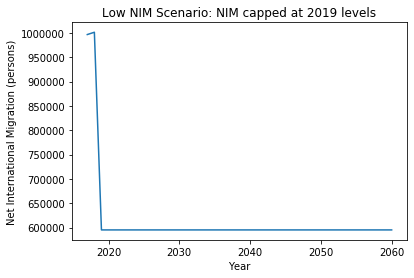

In [8]:
# plot with low NIM
plt.plot(year,nim_df_mf['NIM_LOW'])
plt.title('Low NIM Scenario: NIM capped at 2019 levels')
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')


In [9]:
# create new df that groups together ages by three main age groups: i) under 15 years, 2) 15-44 years,
# 3) over 44 years by merging columns 
#print(nim_df.columns)

# create new df by age groups and filter to show all races.
nim_df_agegroups = nim_df
nim_df_agegroups = nim_df_agegroups.loc[(nim_df['RACE_HISP']==0),:]


# store columns under new lists by the three age groups
age_under_15 = ['NIM_0', 'NIM_1', 'NIM_2',
       'NIM_3', 'NIM_4', 'NIM_5', 'NIM_6', 'NIM_7', 'NIM_8', 'NIM_9', 'NIM_10',
       'NIM_11', 'NIM_12', 'NIM_13', 'NIM_14']
age_15_44 = ['NIM_15', 'NIM_16', 'NIM_17',
       'NIM_18', 'NIM_19', 'NIM_20', 'NIM_21', 'NIM_22', 'NIM_23', 'NIM_24',
       'NIM_25', 'NIM_26', 'NIM_27', 'NIM_28', 'NIM_29', 'NIM_30', 'NIM_31',
       'NIM_32', 'NIM_33', 'NIM_34', 'NIM_35', 'NIM_36', 'NIM_37', 'NIM_38',
       'NIM_39', 'NIM_40', 'NIM_41', 'NIM_42', 'NIM_43', 'NIM_44']
age_over_44 = ['NIM_45',
       'NIM_46', 'NIM_47', 'NIM_48', 'NIM_49', 'NIM_50', 'NIM_51', 'NIM_52',
       'NIM_53', 'NIM_54', 'NIM_55', 'NIM_56', 'NIM_57', 'NIM_58', 'NIM_59',
       'NIM_60', 'NIM_61', 'NIM_62', 'NIM_63', 'NIM_64', 'NIM_65', 'NIM_66',
       'NIM_67', 'NIM_68', 'NIM_69', 'NIM_70', 'NIM_71', 'NIM_72', 'NIM_73',
       'NIM_74', 'NIM_75', 'NIM_76', 'NIM_77', 'NIM_78', 'NIM_79', 'NIM_80',
       'NIM_81', 'NIM_82', 'NIM_83', 'NIM_84', 'NIM_85']

# sum the age groups and store in new dataframe
nim_df_agegroups['Under 15 years'] = nim_df_agegroups[age_under_15].sum(axis=1)
nim_df_agegroups['15 to 44 years'] = nim_df_agegroups[age_15_44].sum(axis=1)
nim_df_agegroups['Over 44 years'] = nim_df_agegroups[age_over_44].sum(axis=1)
nim_df_agegroups

# remove extraneous columns
nim_df_agegroups = nim_df_agegroups[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','Under 15 years',
       '15 to 44 years', 'Over 44 years']]
nim_df_agegroups

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years
0,0,0,2017,996800,188862,720794,87144
1,0,0,2018,1001528,191067,727784,82677
2,0,0,2019,1005801,193119,734795,77887
3,0,0,2020,1009861,194887,742013,72961
4,0,0,2021,1013839,196414,749277,68148
...,...,...,...,...,...,...,...
127,0,2,2056,594882,115836,471221,7825
128,0,2,2057,596196,116219,472918,7059
129,0,2,2058,597595,116609,474632,6354
130,0,2,2059,599062,117001,476372,5689


1117651


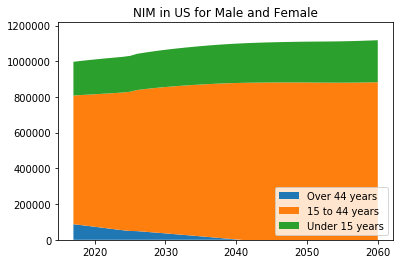

In [24]:
# filter for all sexes 
nim_df_agegroups_mf = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==0),:]

# plot NIM for all sexes using stackplot
x = range(2017,2061)
y = [nim_df_agegroups_mf['Over 44 years'],nim_df_agegroups_mf['15 to 44 years'],nim_df_agegroups_mf['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('NIM in US for Male and Female')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)


In [25]:
# create new df for NIM females only by age group where sex ==2 is females only
nim_df_agegroups_females = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==2),:]
nim_df_agegroups_females.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years
88,0,2,2017,507257,91595,357867,57795
89,0,2,2018,509748,92861,361362,55525
90,0,2,2019,512091,93990,364906,53195
91,0,2,2020,514370,94924,368588,50858
92,0,2,2021,516653,95750,372274,48629


(0, 1217651)

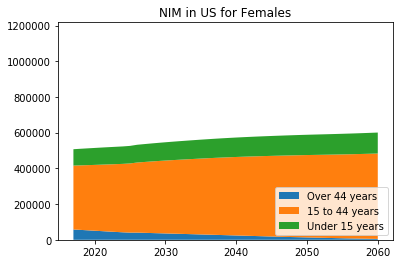

In [28]:
# plot NIM for females only using stackplot
x = range(2017,2061)
y = [nim_df_agegroups_females['Over 44 years'],nim_df_agegroups_females['15 to 44 years'],nim_df_agegroups_females['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('NIM in US for Females')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)
